In [1]:
#Adapted from Algorithm A3.5 from 'The NURBS BOOK' pg103.
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits import mplot3d

## Function to find Non-Zero basis Functions

In [2]:
def BasisFuns(knot_position_inp,u_inp,degree_inp,knot_vector_inp):
    N =np.zeros(degree_inp+1)
    N[0] = 1.0
    left =np.zeros(degree_inp+2)
    right =np.zeros(degree_inp+2)
    for j in range(1,degree_inp+1):
        left[j] = u_inp - knot_vector_inp[knot_position_inp+1-j]
        right[j] = knot_vector_inp[knot_position_inp+j] - u_inp
        saved= 0.0
        for r in range(0,j):
            temp = N[r]/(right[r+1]+left[j-r])
            N[r] = saved + right[r+1]*temp
            saved = left[j-r]*temp
        N[j] = saved
    return N

## Function to find span of the knot in knot vector

In [3]:
def FindSpan(n_inp,degree_inp,u_inp,knot_vector_inp):
    x=knot_vector_inp[degree_inp+1]
    if (u_inp < x):
        return degree_inp
    else:
        for i,pos in enumerate(knot_vector_inp):
            if math.floor(u_inp) == pos:
                return (i)

# def FindSpan(n_inp,degree_inp,u_inp,knot_vector_inp):
#     a = np.array(u_inp)
#     if (a.any() < knot_vector_inp[degree_inp+1]):
#         return degree_inp
#     else:
#         for j in range(np.size(a)):
#             for i,pos in enumerate(knot_vector_inp):
#                 if math.floor(u_inp[j]) == pos:
#                     return (i)

## Function to find point on a NURBS_Surface

In [4]:
def Bspline_Surface_Point(n,p,U,m,q,V,Pw,u,v):
    surface_point=np.zeros(3)
    temp=np.zeros(q+1)
    uspan = FindSpan(n,p,u,U)
    Nu=BasisFuns(uspan,u,p,U)
    vspan = FindSpan(m,q,v,V)
    Nv=BasisFuns(vspan,v,q,V)
    S=np.zeros(4)
    for d in range(4):
        for l in range(q+1):
            temp[l]=0.0
            for k in range(p+1):
                temp[l]=temp[l]+Nu[k]*np.array(Pw[uspan-p+k][vspan-q+l][d])
        Sw=0.0
        for l in range(q+1):
            Sw=Sw+Nv[l]*temp[l]
        S[d]=Sw
    #S = Sw/w
    #S = Sw
    surface_point=S[:-1]/S[-1]
    return surface_point

In [5]:
#Can take input from knot vector function
#Defining input parameters to funtion, here manually
U = np.array([0., 0., 0., 1., 2., 3., 4., 4., 5., 5., 5.])
V = np.array([0., 0., 0., 1., 2., 3., 3., 3.])
u=2.5
v=1
p=2
q=2
n=(np.size(U)-1)-p-1
m=(np.size(V)-1)-q-1
#Pw=np.array([[[],[],[],[],[]],
#            [[],[],[],[],[]],
#            [[],[0.,2.,4.,1.],[0.,6.,4.,2.],[0.,2.,0.,1.],[]],
#            [[],[4.,6.,8.,2.],[12.,24.,12.,6.],[4.,6.,0.,2.],[]],
#            [[],[4.,2.,4.,1.],[8.,6.,4.,2.],[4.,2.,0.,1.],[]],
#            [[],[],[],[],[]],
#            [[],[],[],[],[]],
#            [[],[],[],[],[]]])
Pw=np.array([[[0.,2.,4.,1.],[0.,2.,4.,1.],[0.,2.,4.,1.],[0.,2.,4.,1.],[0.,2.,4.,1.]],
            [[0.,2.,4.,1.],[0.,2.,4.,1.],[0.,2.,4.,1.],[0.,2.,4.,1.],[0.,2.,4.,1.]],
            [[0.,2.,4.,1.],[0.,2.,4.,1.],[0.,6.,4.,2.],[0.,2.,0.,1.],[0.,2.,4.,1.]],
            [[0.,2.,4.,1.],[4.,6.,8.,2.],[12.,24.,12.,6.],[4.,6.,0.,2.],[0.,2.,4.,1.]],
            [[0.,2.,4.,1.],[4.,2.,4.,1.],[8.,6.,4.,2.],[4.,2.,0.,1.],[0.,2.,4.,1.]],
            [[0.,2.,4.,1.],[0.,2.,4.,1.],[0.,2.,4.,1.],[0.,2.,4.,1.],[0.,2.,4.,1.]],
            [[0.,2.,4.,1.],[0.,2.,4.,1.],[0.,2.,4.,1.],[0.,2.,4.,1.],[0.,2.,4.,1.]],
            [[0.,2.,4.,1.],[0.,2.,4.,1.],[0.,2.,4.,1.],[0.,2.,4.,1.],[0.,2.,4.,1.]]])
#print(2*np.array(Pw[4][2][0]))

S_r = Bspline_Surface_Point(n,p,U,m,q,V,Pw,u,v)
print(S_r)


[2.         3.62962963 2.51851852]


In [6]:
# U = np.array([0., 0., 1., 1.])
# V = np.array([0., 0., 1., 1.])
# u=1
# v=0.5
# p=1
# q=1
# n=(np.size(U)-1)-p-1
# m=(np.size(V)-1)-q-1
# Pw=np.array([[[0,0,0,1],[1,0,0,1]],
#           [[0,1,0,1],[1,1,0,1]]])
# S_r = Bspline_Surface_Point(n,p,U,m,q,V,Pw,u,v)
# print(S_r)

In [7]:
# U = np.array([0., 0., 1., 1.])
# V = np.array([0., 0., 1., 1.])
# # u_m=0.9
# # v_m=0.5
# u=np.linspace(U[0],(U[-1]-0.1),9)
# v=np.linspace(V[0],(V[-1]-0.1),9)
# u_m,v_m = np.meshgrid(u,v)
# print(u_m)
# p=1
# q=1
# n=(np.size(U)-1)-p-1
# m=(np.size(V)-1)-q-1
# Pw=np.array([[[0,0,0,1],[1,0,0,1]],
#           [[0,1,0,1],[1,1,0,1]]])
# S_r = Bspline_Surface_Point(n,p,U,m,q,V,Pw,u_m,v_m)
# print(S_r)

## Looping over u and v to generate surface points

In [26]:
U = np.array([0., 0., 1., 1.])
V = np.array([0., 0., 1., 1.])
u_values=np.linspace(U[0],(U[-1]-0.000001),9)
v_values=np.linspace(V[0],(V[-1]-0.000001),10)
surface=np.zeros((np.size(u_values),np.size(v_values),3))
p=1
q=1
n=(np.size(U)-1)-p-1
m=(np.size(V)-1)-q-1
Pw=np.array([[[0,0,0,1],[1,0,0,1]],
          [[0,1,0,1],[1,1,0,1]]])
for i,u in enumerate(u_values):
    for j,v in enumerate(v_values):
        S_r = Bspline_Surface_Point(n,np.copy(p),U,m,np.copy(q),V,Pw,u,v)
        surface[i,j]=S_r
# print(surface[0,:,0])
# print(surface[:,1,1])
y_values=surface[0,:,0]
x_values=surface[:,1,1]
X,Y=np.meshgrid(x_values,y_values)
Z=np.zeros_like(X)

## Plotting Surface

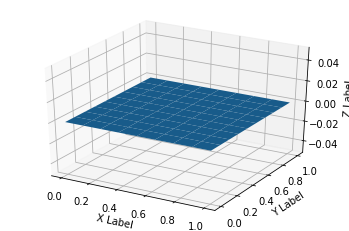

In [23]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  
# Axes3D import has side effects, it enables using projection='3d' in add_subplot
import matplotlib.pyplot as plt
import random

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

## Example : Plotting Surface

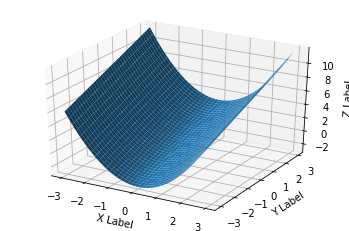

In [19]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  
# Axes3D import has side effects, it enables using projection='3d' in add_subplot
import matplotlib.pyplot as plt
import random

def fun(x, y):
    return x**2 + y

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(-3.0, 3.0, 0.05)
X, Y = np.meshgrid(x, y)
zs = np.array(fun(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()